In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from apps.genetic_algorithms.genetic_program import FitnessFunction
from apps.genetic_algorithms.gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript

CONDENSED_COLS = ['individual_str', 'transaction_currency', 'counter_currency', 'profit_percent', 'benchmark_profit_percent']

%matplotlib inline
pd.set_option('display.max_columns', 500)

from apps.doge.doge_train_test import DogeTrainer
import time
end_timestamp = 1548806400 #int(time.time())  # UTC timestamp
start_timestamp = end_timestamp - 60*60*24
ticker = 'BTC_USDT'

e = DogeTrainer.run_training(start_timestamp, end_timestamp, ticker)
            


INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 58.23% out of 39.20G
INFO:root:>>>>>>> Starting GP training... 
INFO:root:    >>> start_time = 2019/01/29 00:05:00 UTC
INFO:root:    >>> end_time = 2019/01/30 00:05:00 UTC
INFO:root:Loaded 2 rockstars.
INFO:root: >>>>>>>> Building a data object for BTC_USDT...
CRITICAL:root:Encountered duplicate values in price data data, 314 values loaded, 282 remain after removal.
INFO:root:Retrieving values for rsi
INFO:root:Going to Redis for indicator rsi for BTC_USDT at 1548806700...
INFO:root:Retrieving values for sma20
INFO:root:Going to Redis for indicator sma20 for BTC_USDT at 1548806700...
INFO:root:Retrieving values for sma50
INFO:root:Going to Redis for indicator sma50 for BTC_USDT at 1548806700...
INFO:root:Retrieving values for sma200
INFO:root:Going to Redis for indic

### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

HoF::::::
    if_then_el 0.5
    if_then_el 0.375
    if_then_el 0.2777777777777778
    if_then_el 0.2727272727272727
    if_then_el 0.2
    if_then_el 0.16666666666666666
    if_then_el 0.13793103448275862
    if_then_el 0.13333333333333333
    if_then_el 0.125
    if_then_el 0.10526315789473684
GenBest::::::
    if_then_el 0.5
    if_then_el 0.5
HoF::::::
    if_then_el 0.375
    if_then_el 0.3333333333333333
    if_then_el 0.2777777777777778
    if_then_el 0.2727272727272727
    if_then_el 0.2
    if_then_el 0.13333333333333333
    if_then_el 0.10526315789473684
    if_then_el 0.10344827586206896
    if_then_el 0.1
    if_then_el 0.05263157894736842
GenBest::::::
    if_then_el 0.3333333333333333
    if_then_el 0.375
Experiment id: run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs



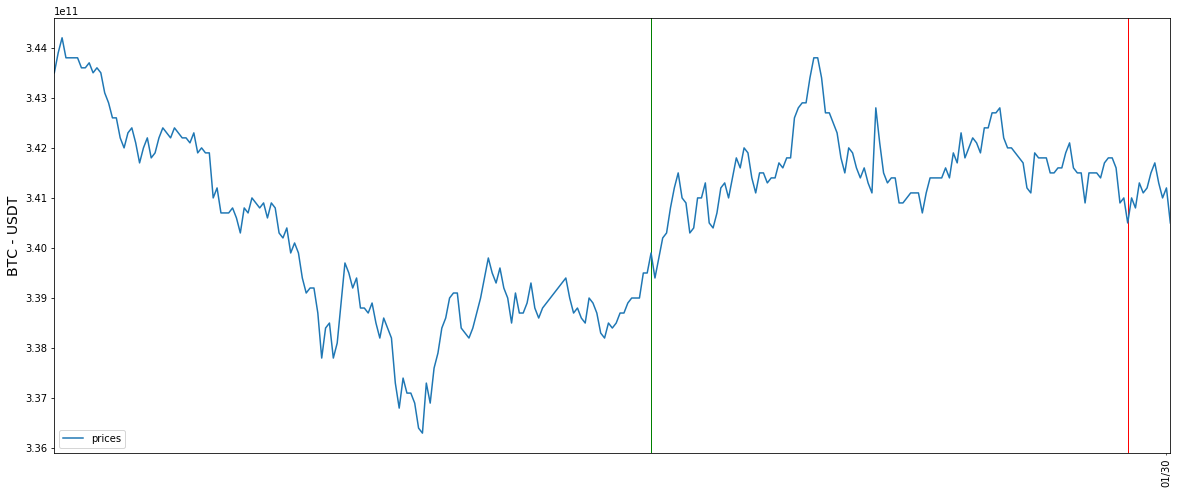

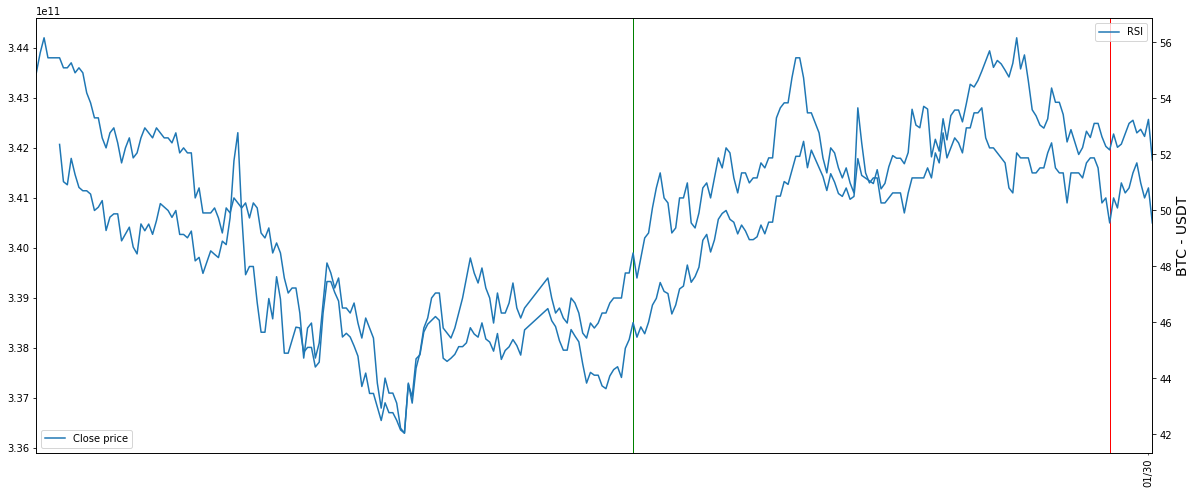

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))



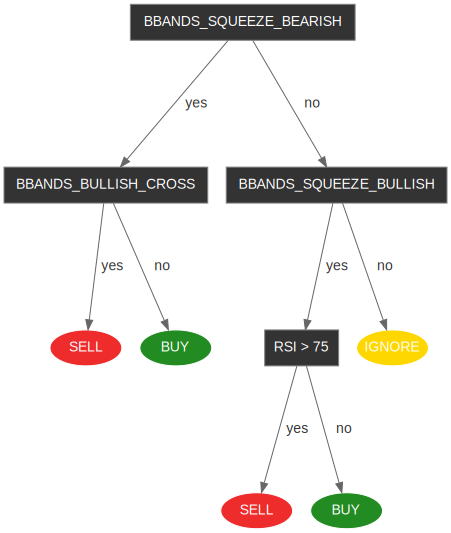

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 23:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.76 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 23:10:00 UTC rsi_value=None
   cash: 999.7626963812886    crypto: 0.0
End time: 2019/01/30 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 999.76 USDT
End crypto: 0.000000 BTC
End price: 340500000000.0
Total value invested: 1000 USDT
Total value after investment: 9

In [3]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

In [4]:
len(e.training_data[0].indicators['rsi'])
#e.training_data[0].start_time
e.training_data[0].end_time

1548806700.0

We can explore each of the performance dataframes in more detail.

In [5]:
pd.set_option('display.max_colwidth', -1)
performance_dfs[0][CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
0,"if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))",BTC,USDT,-0.023730,-1.071517
1,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_lt_25(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))",BTC,USDT,-0.237393,-1.071517
0,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))",BTC,USDT,-0.237393,-1.071517
8,"if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(lt(ema200(ARG0), sma200(ARG0)), if_then_else(rsi_gt_80(ARG0), ignore, buy), sell), if_then_else(rsi_gt_70(ARG0), buy, if_then_else(bbands_price_lt_low(ARG0), buy, ignore)))",BTC,USDT,-0.474012,-1.071517
1,"if_then_else(bbands_bearish_cross(ARG0), if_then_else(rsi_gt_70(ARG0), buy, sell), if_then_else(bbands_price_gt_up(ARG0), buy, ignore))",BTC,USDT,-1.123459,-1.071517
4,"if_then_else(bbands_bearish_cross(ARG0), buy, sell)",BTC,USDT,-1.141754,-1.071517
4,"if_then_else(bbands_squeeze_bullish(ARG0), buy, sell)",BTC,USDT,-1.141754,-1.071517
8,"if_then_else(candlestick_momentum_buy(ARG0), if_then_else(bbands_price_gt_up(ARG0), buy, sell), buy)",BTC,USDT,-1.227747,-1.071517
5,"if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_lt_20(ARG0), if_then_else(rsi_gt_75(ARG0), ignore, buy), buy), if_then_else(lt(price(ARG0), ema200(ARG0)), if_then_else(bbands_bearish_cross(ARG0), buy, sell), if_then_else(bbands_price_lt_low(ARG0), ignore, buy)))",BTC,USDT,-1.253205,-1.071517
9,"if_then_else(bbands_price_lt_low(ARG0), buy, sell)",BTC,USDT,-1.373231,-1.071517


Experiment id: run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs



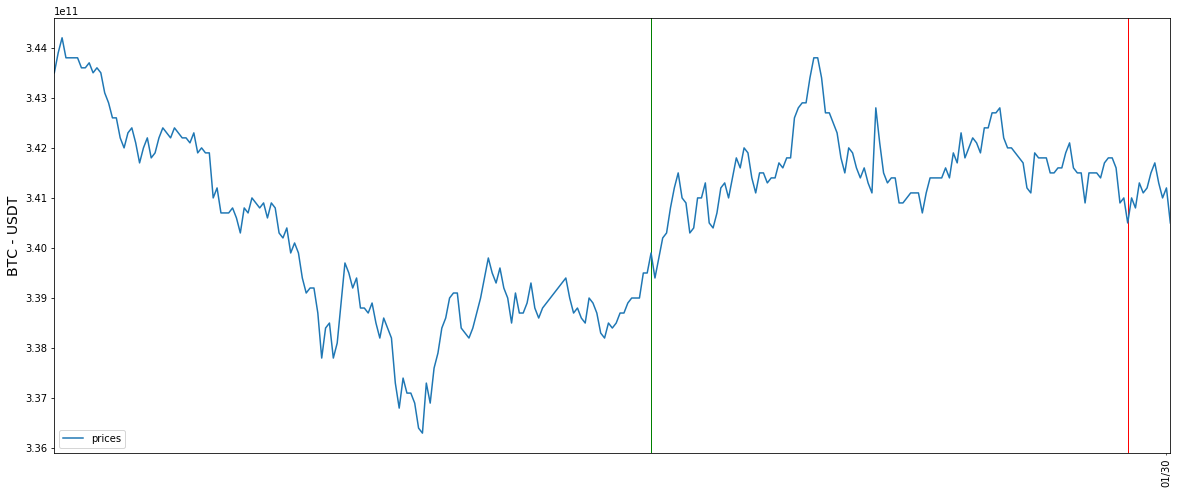

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))



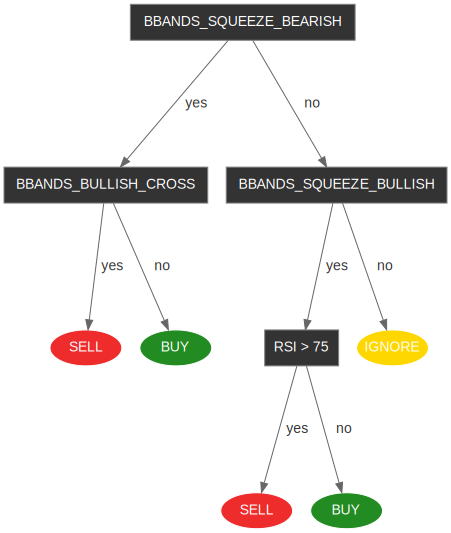

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 23:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.76 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 23:10:00 UTC rsi_value=None
   cash: 999.7626963812886    crypto: 0.0
End time: 2019/01/30 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 999.76 USDT
End crypto: 0.000000 BTC
End price: 340500000000.0
Total value invested: 1000 USDT
Total value after investment: 9

In [6]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [7]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data, sort_by=["fitness_value"], top_n_per_variant=20)

In [8]:
pd.set_option('display.max_colwidth', -1)
best_individuals_across_variants_and_datasets.drop(['individual','variant','evaluations'], axis=1)




,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,all_profits,benchmark_profits,differences
0,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))",ff_trades_percent,0.500000,-0.023730,0.0,-0.023730,-0.023730,-0.02373036187113939,-1.0715165938864628,1.0477862320153235
1,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_squeeze_bearish(ARG0), sell, if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))",ff_trades_percent,0.500000,-0.023730,0.0,-0.023730,-0.023730,-0.02373036187113939,-1.0715165938864628,1.0477862320153235
2,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_lt_25(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))",ff_trades_percent,0.375000,-0.237393,0.0,-0.237393,-0.237393,-0.2373926443102505,-1.0715165938864628,0.8341239495762123
11,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_1.0;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))",ff_trades_percent,0.375000,-0.237393,0.0,-0.237393,-0.237393,-0.2373926443102505,-1.0715165938864628,0.8341239495762123
12,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_1.0;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_bearish_cross(ARG0), if_then_else(rsi_gt_70(ARG0), buy, sell), if_then_else(bbands_price_gt_up(ARG0), buy, ignore))",ff_trades_percent,0.333333,-1.123459,0.0,-1.123459,-1.123459,-1.1234586722298217,-1.0715165938864628,-0.051942078343358844
3,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_price_gt_up(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))",ff_trades_percent,0.277778,-1.376436,0.0,-1.376436,-1.376436,-1.3764363840999636,-1.0715165938864628,-0.3049197902135008
4,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_squeeze_bullish(ARG0), sell, buy)",ff_trades_percent,0.272727,-1.911472,0.0,-1.911472,-1.911472,-1.9114722853463038,-1.0715165938864628,-0.839955691459841
13,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_1.0;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_price_gt_up(ARG0), sell, buy)",ff_trades_percent,0.272727,-1.826074,0.0,-1.826074,-1.826074,-1.8260742834659824,-1.0715165938864628,-0.7545576895795196
14,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_1.0;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_bearish_cross(ARG0), buy, sell)",ff_trades_percent,0.200000,-1.141754,0.0,-1.141754,-1.141754,-1.1417541802296796,-1.0715165938864628,-0.07023758634321675
5,run_evolution.d_BTC-USDT-1548720300-1548806700;gv6;ff_trades_percent;x_0.9;m_0.8;n_500;gen_2;td_4;a;nrs,"if_then_else(bbands_squeeze_bullish(ARG0), buy, sell)",ff_trades_percent,0.200000,-1.141754,0.0,-1.141754,-1.141754,-1.1417541802296796,-1.0715165938864628,-0.07023758634321675


### How did this individual perform on training sets?

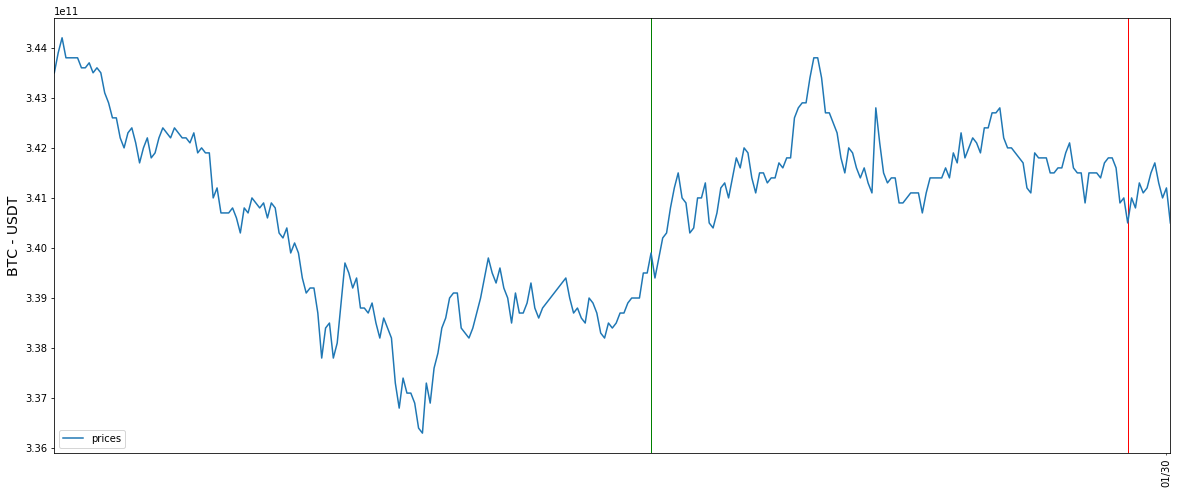

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))



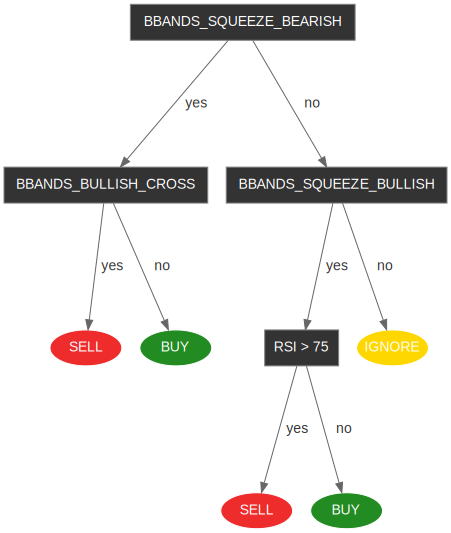

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/29 00:05:00 UTC
--
--
2019/01/29 12:55:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/29 12:55:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.93909973521624e-09
2019/01/29 23:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.76 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/29 23:10:00 UTC rsi_value=None
   cash: 999.7626963812886    crypto: 0.0
End time: 2019/01/30 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 999.76 USDT
End crypto: 0.000000 BTC
End price: 340500000000.0
Total value invested: 1000 USDT
Total value after investment: 9

In [9]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

In [10]:
filtered = best_individuals_across_variants_and_datasets
filtered = filtered[filtered.fitness_value > 0]

CRITICAL:root:Encountered duplicate values in price data data, 320 values loaded, 288 remain after removal.
INFO:root:Going to Redis for indicator rsi for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator sma20 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator sma50 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator sma200 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator ema20 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator ema50 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator ema200 for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator bb_up for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator bb_mid for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator bb_low for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator bb_squeeze for BTC_USDT at 1548893100...
INFO:root:Going to Redis for indicator macd for BTC_USDT at 

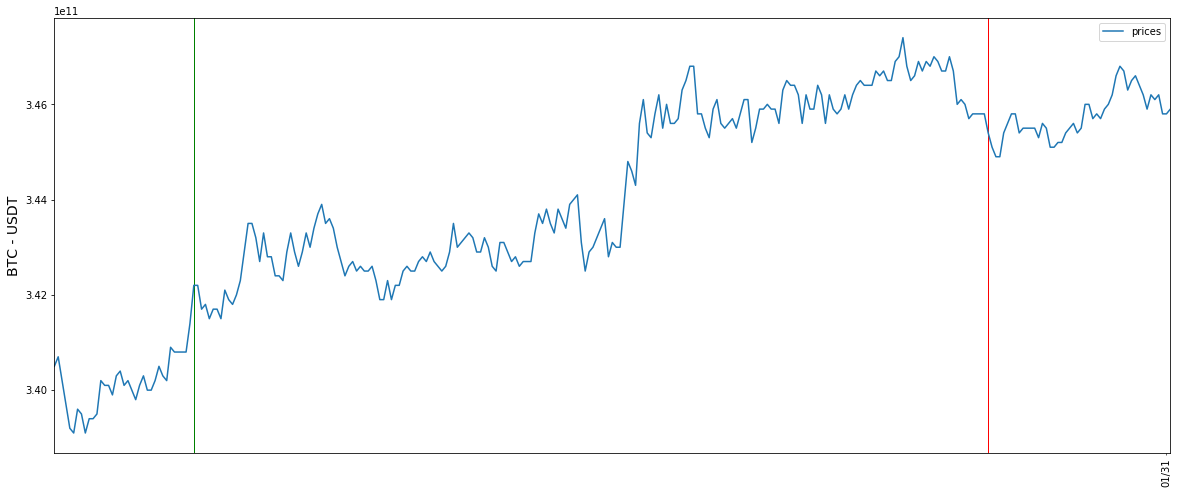

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))



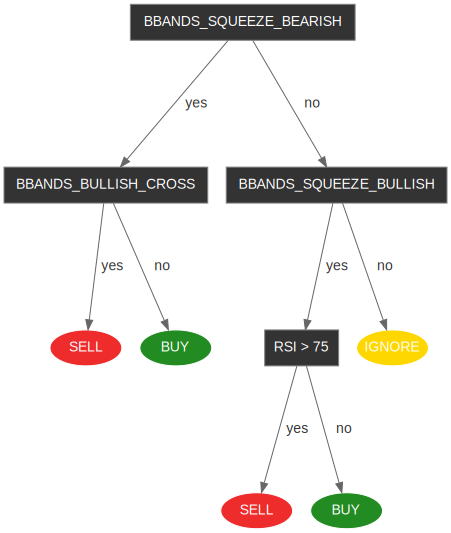

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1007.33 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1007.3335634132087    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1007.33 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment

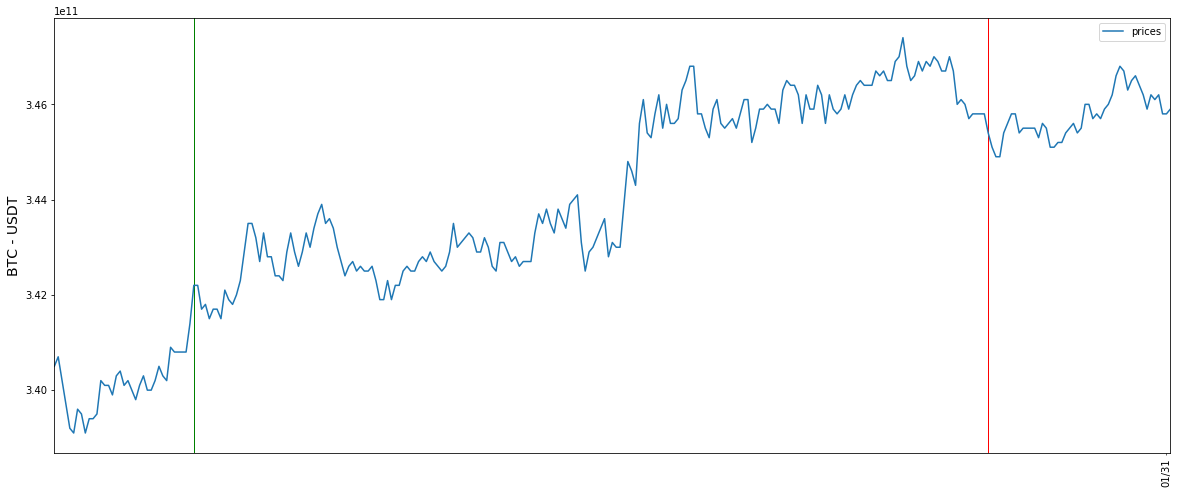

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), sell, if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_gt_75(ARG0), sell, buy), ignore))



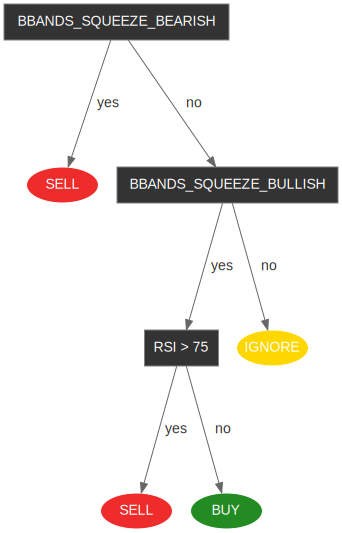

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1007.33 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1007.3335634132087    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1007.33 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment

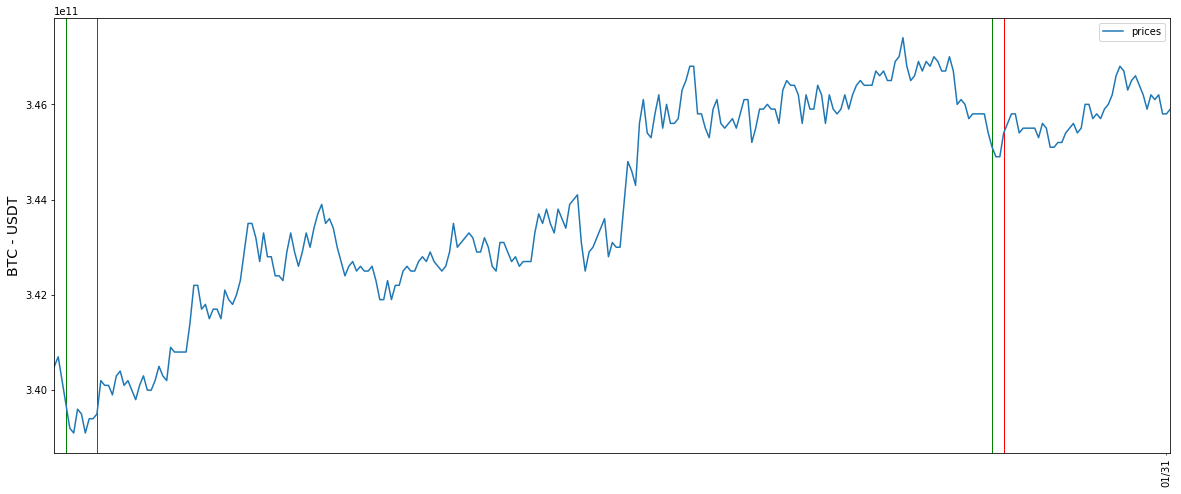

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_lt_25(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))



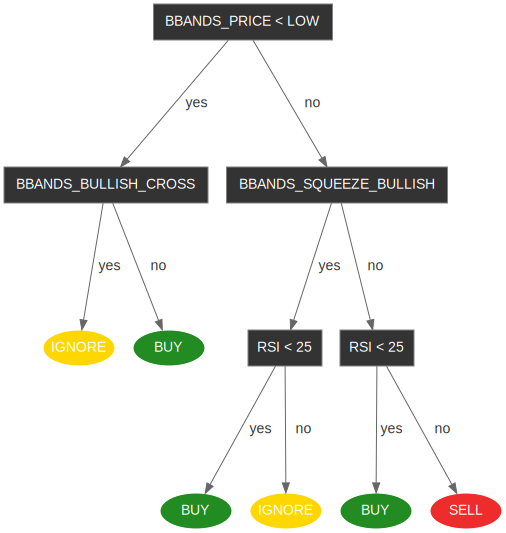

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.940830144244922e-09
2019/01/30 01:00:00 UTC  	 OrderType.SELL   	 delta_cash ->        997.41 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 339500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 01:00:00 UTC rsi_value=None
   cash: 997.4134221371799    crypto: 0.0
2019/01/30 20:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -997.41 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

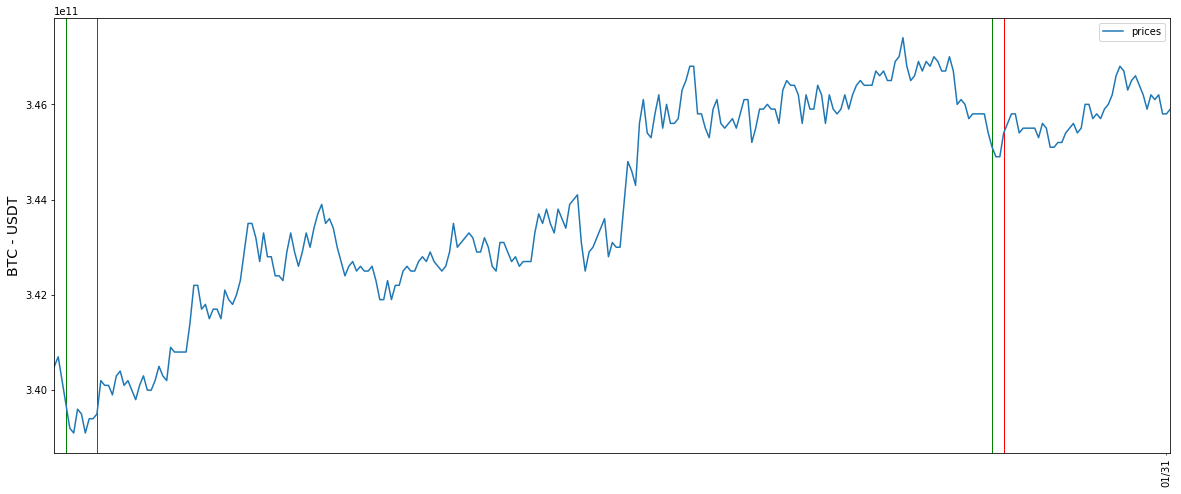

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))



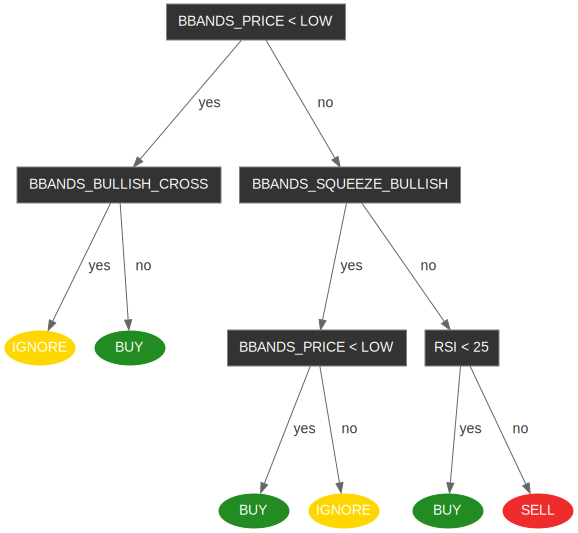

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.940830144244922e-09
2019/01/30 01:00:00 UTC  	 OrderType.SELL   	 delta_cash ->        997.41 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 339500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 01:00:00 UTC rsi_value=None
   cash: 997.4134221371799    crypto: 0.0
2019/01/30 20:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -997.41 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

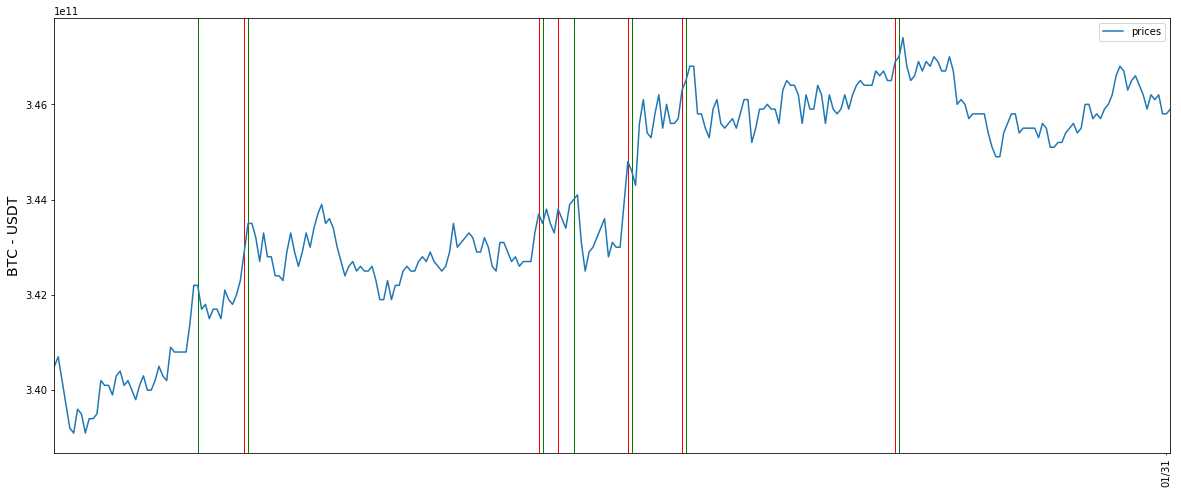

String representation:
if_then_else(bbands_bearish_cross(ARG0), if_then_else(rsi_gt_70(ARG0), buy, sell), if_then_else(bbands_price_gt_up(ARG0), buy, ignore))



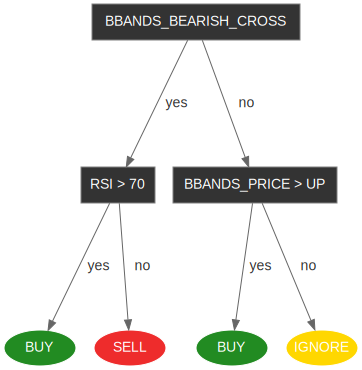

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 04:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1000.04 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 04:10:00 UTC rsi_value=None
   cash: 1000.0424982466394    crypto: 0.0
2019/01/30 04:15:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.04 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 343500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

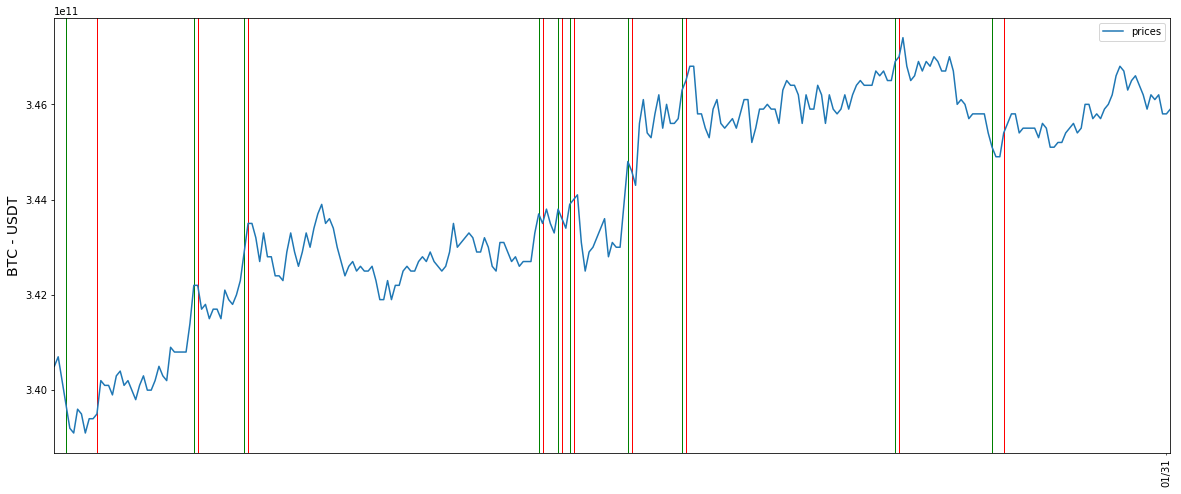

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_bullish_cross(ARG0), ignore, buy), if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(bbands_price_gt_up(ARG0), buy, ignore), if_then_else(rsi_lt_25(ARG0), buy, sell)))



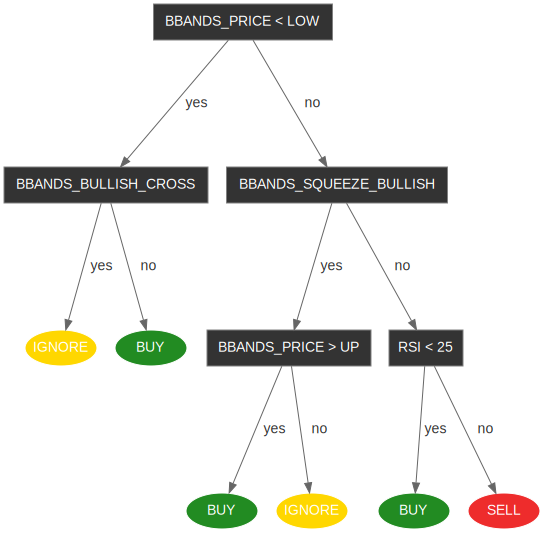

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.940830144244922e-09
2019/01/30 01:00:00 UTC  	 OrderType.SELL   	 delta_cash ->        997.41 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 339500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 01:00:00 UTC rsi_value=None
   cash: 997.4134221371799    crypto: 0.0
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->       -997.41 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

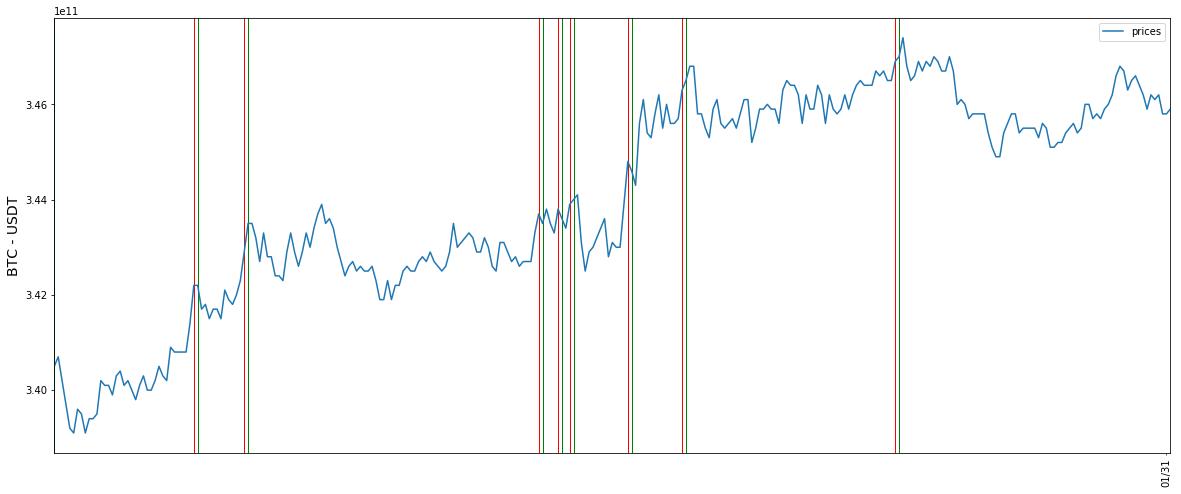

String representation:
if_then_else(bbands_squeeze_bullish(ARG0), sell, buy)



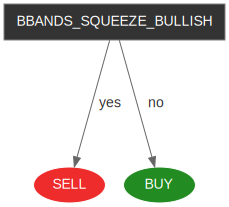

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 03:05:00 UTC  	 OrderType.SELL   	 delta_cash ->       1002.98 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 1002.9836775330397    crypto: 0.0
2019/01/30 03:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1002.98 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

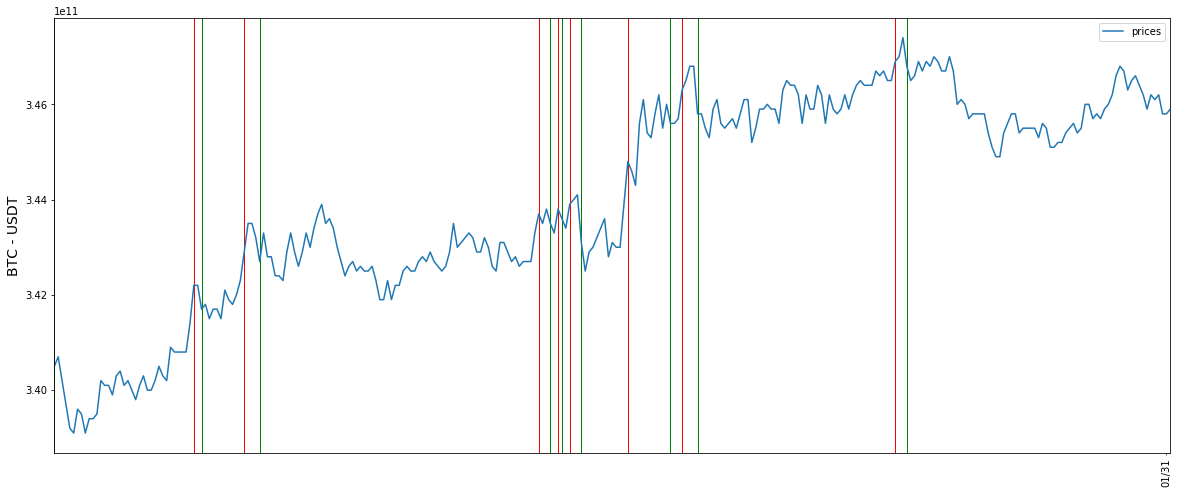

String representation:
if_then_else(bbands_price_gt_up(ARG0), sell, buy)



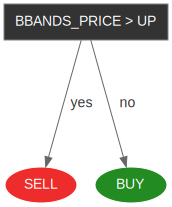

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 03:05:00 UTC  	 OrderType.SELL   	 delta_cash ->       1002.98 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 1002.9836775330397    crypto: 0.0
2019/01/30 03:15:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1002.98 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 341700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

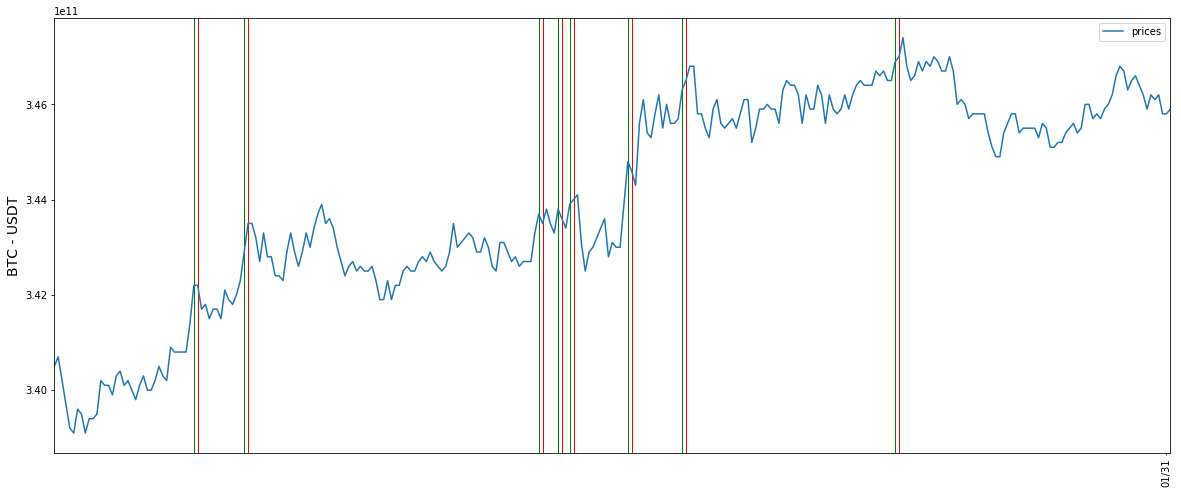

String representation:
if_then_else(bbands_bearish_cross(ARG0), buy, sell)



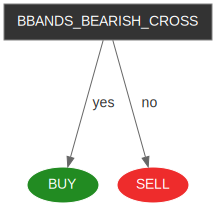

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

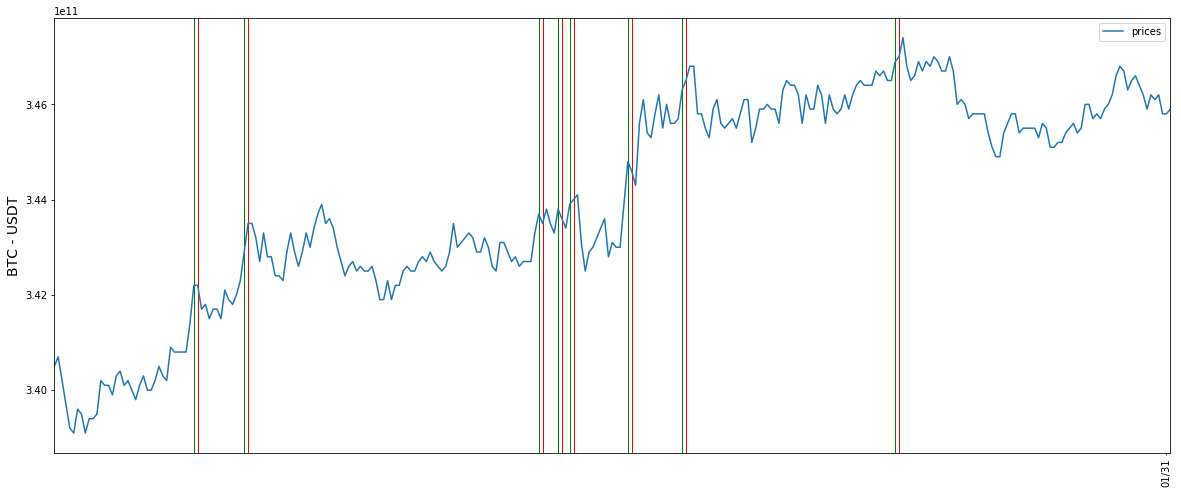

String representation:
if_then_else(bbands_squeeze_bullish(ARG0), buy, sell)



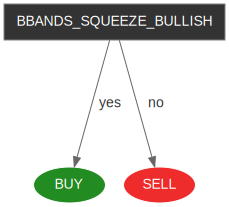

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

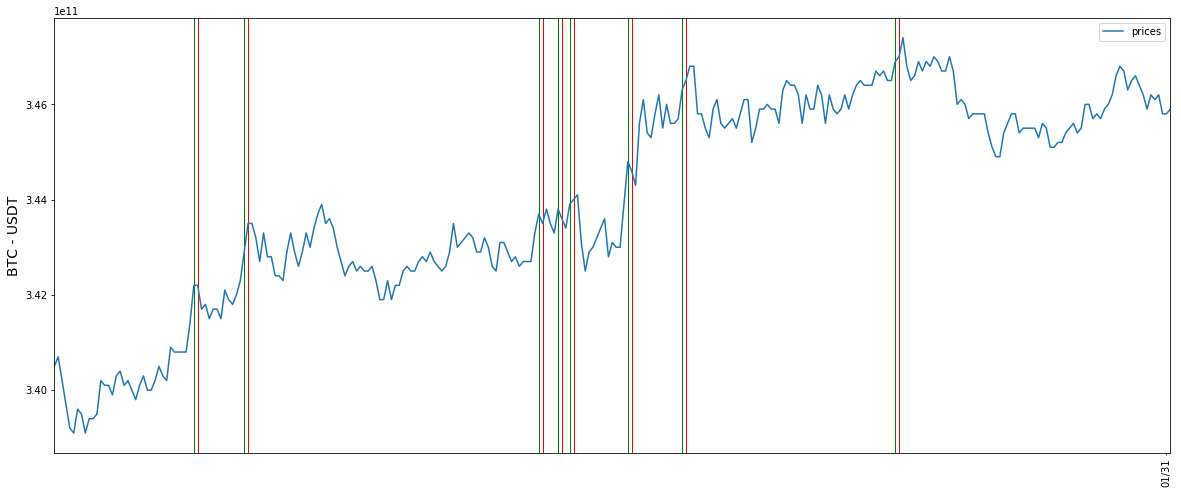

String representation:
if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(rsi_lt_20(ARG0), if_then_else(rsi_gt_75(ARG0), ignore, buy), buy), if_then_else(lt(price(ARG0), ema200(ARG0)), if_then_else(bbands_bearish_cross(ARG0), buy, sell), if_then_else(bbands_price_lt_low(ARG0), ignore, buy)))



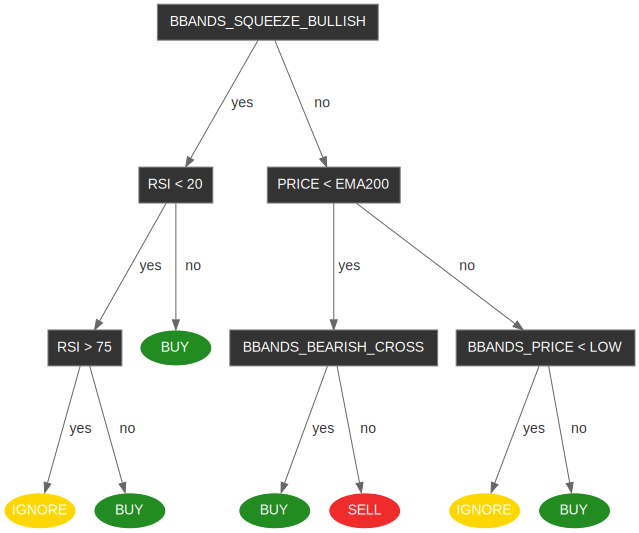

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.00 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:10:00 UTC rsi_value=None
   cash: 998.001    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT streng

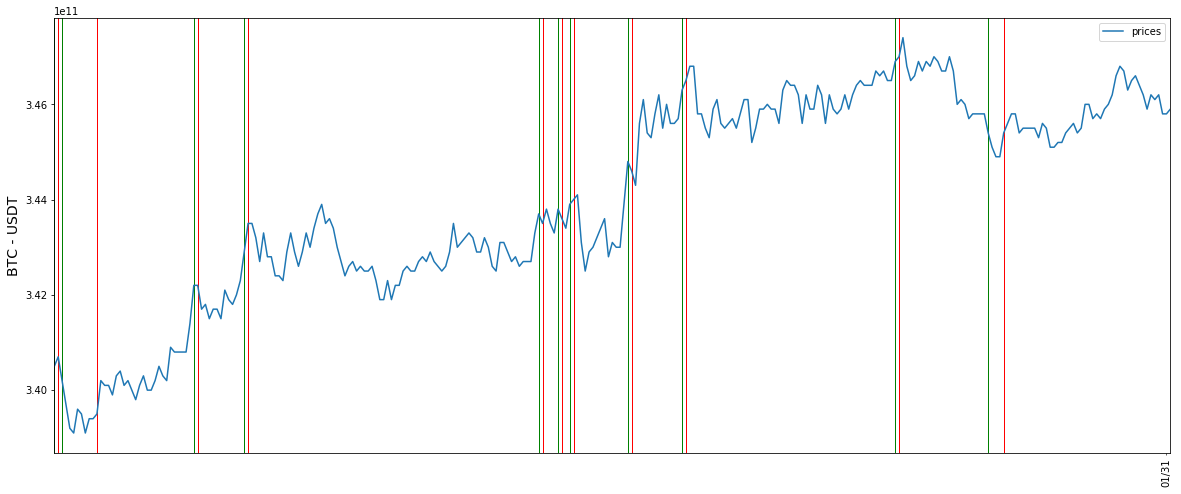

String representation:
if_then_else(bbands_price_lt_low(ARG0), buy, if_then_else(bbands_bearish_cross(ARG0), buy, sell))



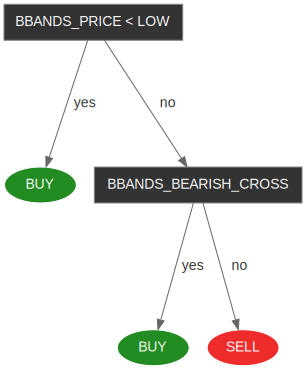

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 00:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.59 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 998.5871973568281    crypto: 0.0
2019/01/30 00:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.59 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U


Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, counter_currency=USDT, source=binance
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/31 00:05:00 UTC  	 OrderType.SELL   	 delta_cash ->       1013.83 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345900000000.00000000 USDT ), slippage = 0.00
   cash: 1013.8283286343612    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1013.83 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1013.83 USDT (+1.38%)
Profit: 13.83 USDT

Additional stats:
  Max drawdown: -0.0071963154864710

INFO:root:Unable to form decision for BTC_USDT at 1548882300: unsupported operand type(s) for *: 'float' and 'NoneType'


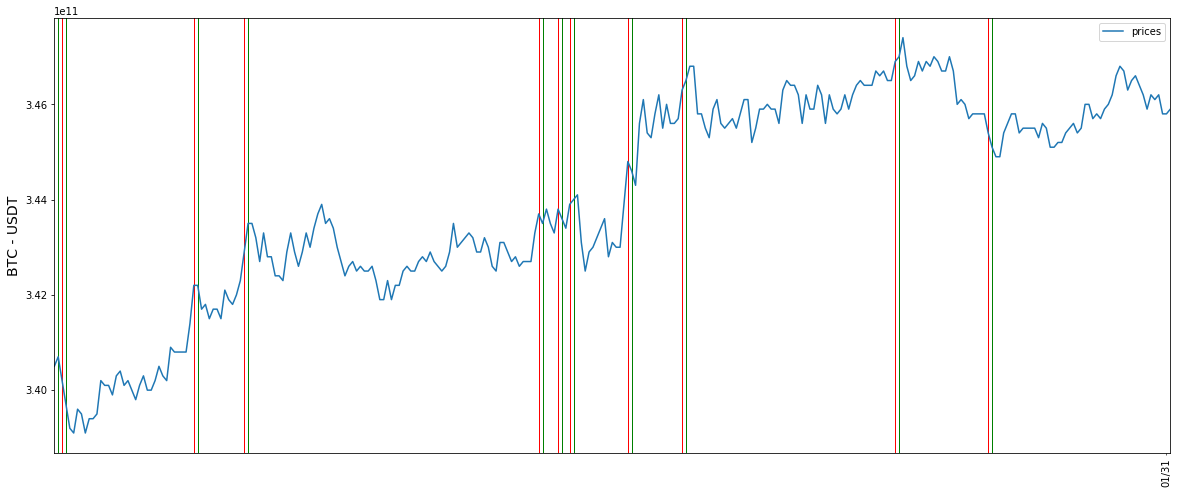

String representation:
if_then_else(bbands_bullish_cross(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), sell, ignore), if_then_else(and_(bbands_squeeze_bullish(ARG0), candlestick_momentum_buy(ARG0)), sell, if_then_else(bbands_squeeze_bearish(ARG0), sell, buy)))



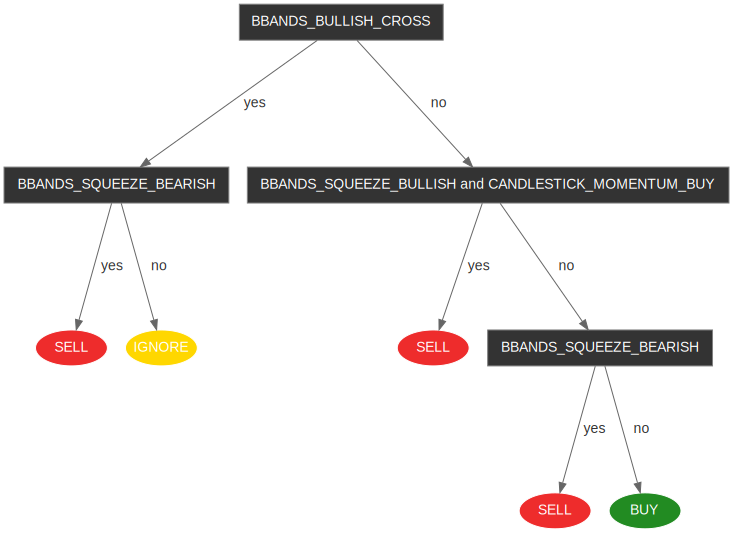

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.9321984150278838e-09
2019/01/30 00:15:00 UTC  	 OrderType.SELL   	 delta_cash ->        996.54 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:15:00 UTC rsi_value=None
   cash: 996.5363668916935    crypto: 0.0
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->       -996.54 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-


Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, counter_currency=USDT, source=binance
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/31 00:05:00 UTC  	 OrderType.SELL   	 delta_cash ->       1013.83 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345900000000.00000000 USDT ), slippage = 0.00
   cash: 1013.8283286343612    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1013.83 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1013.83 USDT (+1.38%)
Profit: 13.83 USDT

Additional stats:
  Max drawdown: -0.0071963154864710

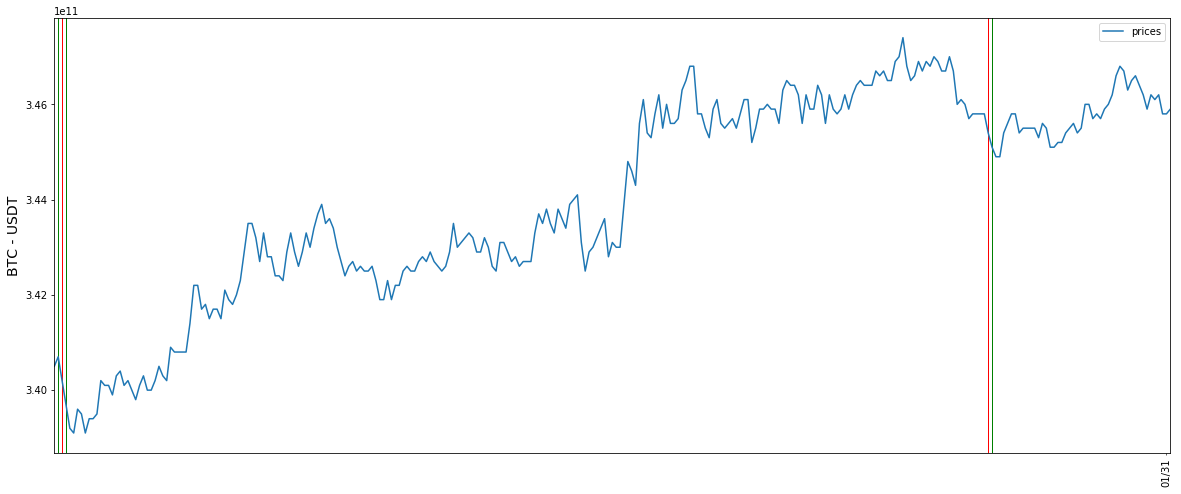

String representation:
if_then_else(bbands_squeeze_bullish(ARG0), if_then_else(lt(price(ARG0), ema50(ARG0)), if_then_else(bbands_price_gt_up(ARG0), sell, buy), buy), if_then_else(bbands_squeeze_bearish(ARG0), sell, buy))



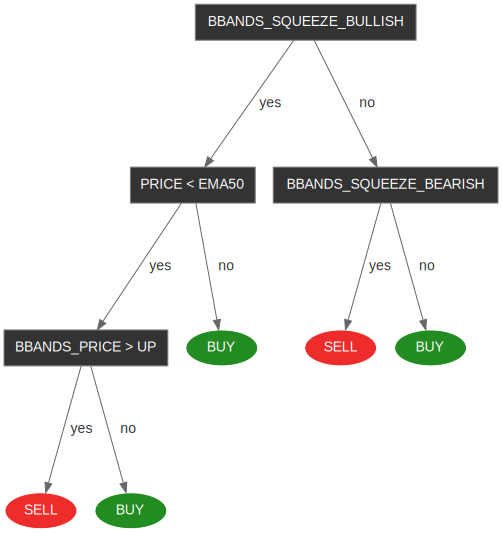

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:10:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.9321984150278838e-09
2019/01/30 00:15:00 UTC  	 OrderType.SELL   	 delta_cash ->        996.54 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:15:00 UTC rsi_value=None
   cash: 996.5363668916935    crypto: 0.0
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->       -996.54 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

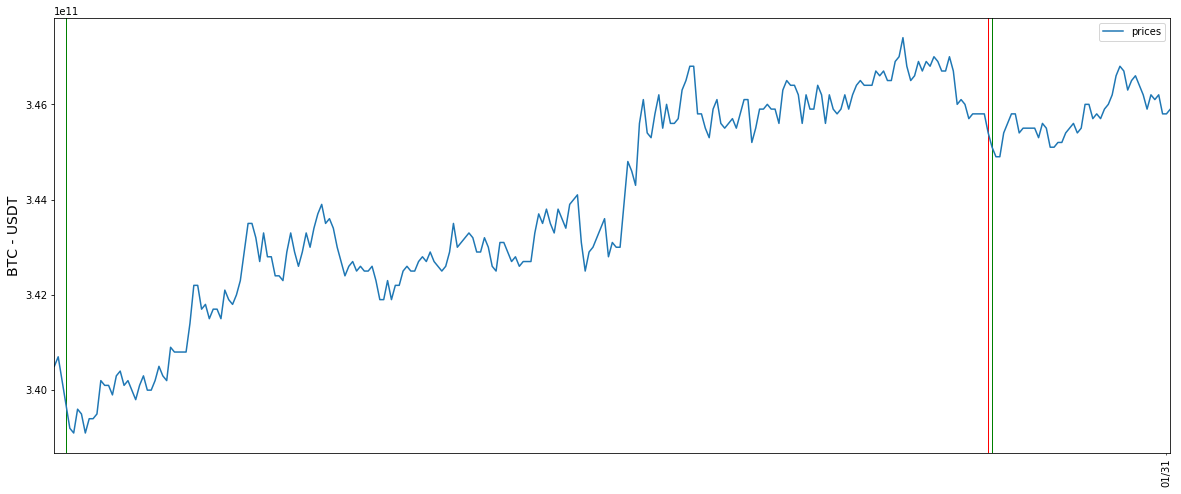

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), if_then_else(lt(ema200(ARG0), sma200(ARG0)), if_then_else(rsi_gt_80(ARG0), ignore, buy), sell), if_then_else(rsi_gt_70(ARG0), buy, if_then_else(bbands_price_lt_low(ARG0), buy, ignore)))



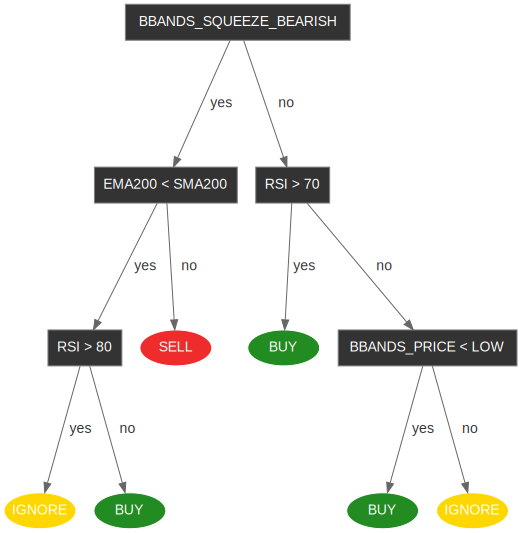

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:20:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 339700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:20:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.940830144244922e-09
2019/01/30 20:10:00 UTC  	 OrderType.SELL   	 delta_cash ->       1014.75 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345400000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 20:10:00 UTC rsi_value=None
   cash: 1014.7469690903739    crypto: 0.0
2019/01/30 20:15:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1014.75 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-

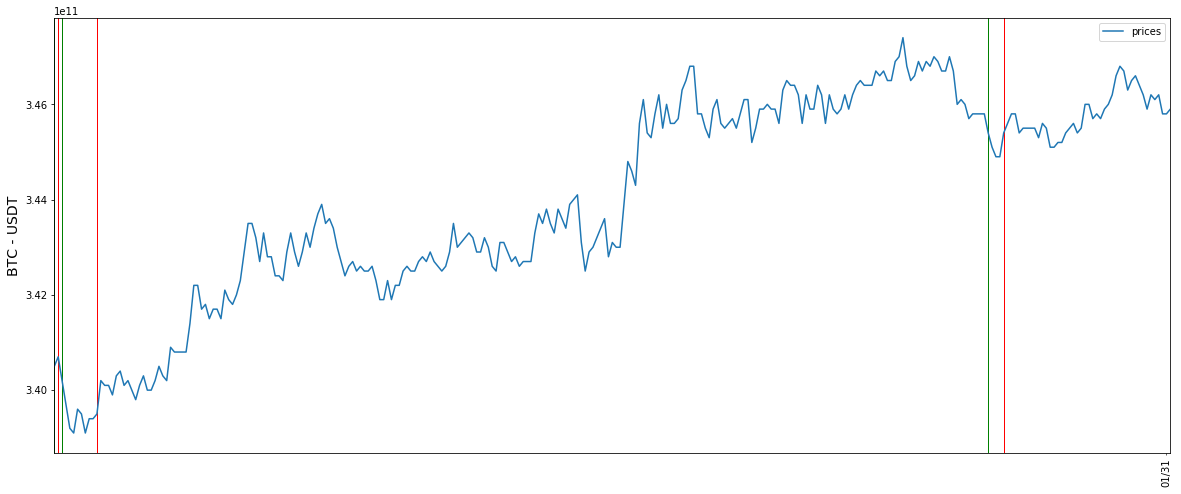

String representation:
if_then_else(bbands_price_lt_low(ARG0), buy, sell)



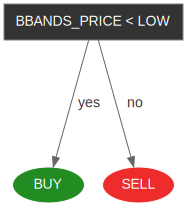

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 00:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.59 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 998.5871973568281    crypto: 0.0
2019/01/30 00:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.59 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

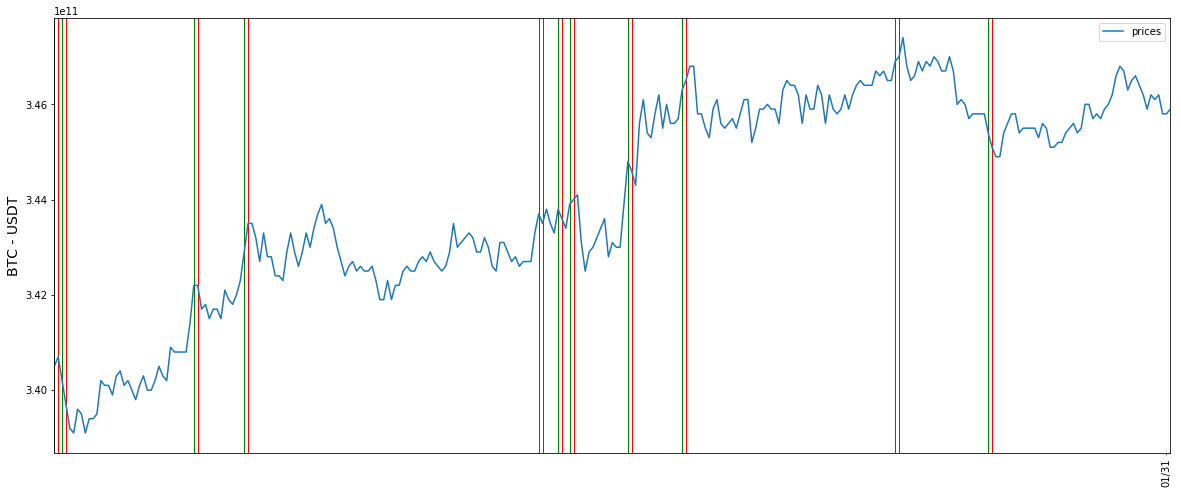

String representation:
if_then_else(bbands_squeeze_bullish(ARG0), buy, if_then_else(bbands_squeeze_bearish(ARG0), buy, sell))



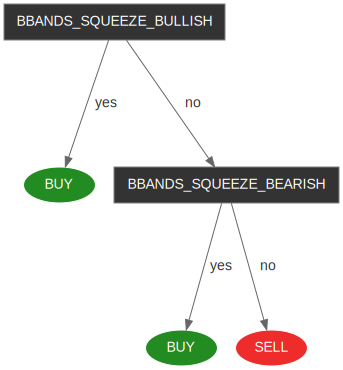

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 00:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.59 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 998.5871973568281    crypto: 0.0
2019/01/30 00:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.59 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U


Benchmark backtesting report:
 Buy&hold, start_time=1548806700, end_time=1548893100, transaction_currency=BTC, counter_currency=USDT, source=binance
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/31 00:05:00 UTC  	 OrderType.SELL   	 delta_cash ->       1013.83 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 345900000000.00000000 USDT ), slippage = 0.00
   cash: 1013.8283286343612    crypto: 0.0
End time: 2019/01/31 00:05:00 UTC

Summary
--
Number of trades: 2
End cash: 1013.83 USDT
End crypto: 0.000000 BTC
End price: 345900000000.0
Total value invested: 1000 USDT
Total value after investment: 1013.83 USDT (+1.38%)
Profit: 13.83 USDT

Additional stats:
  Max drawdown: -0.0071963154864710

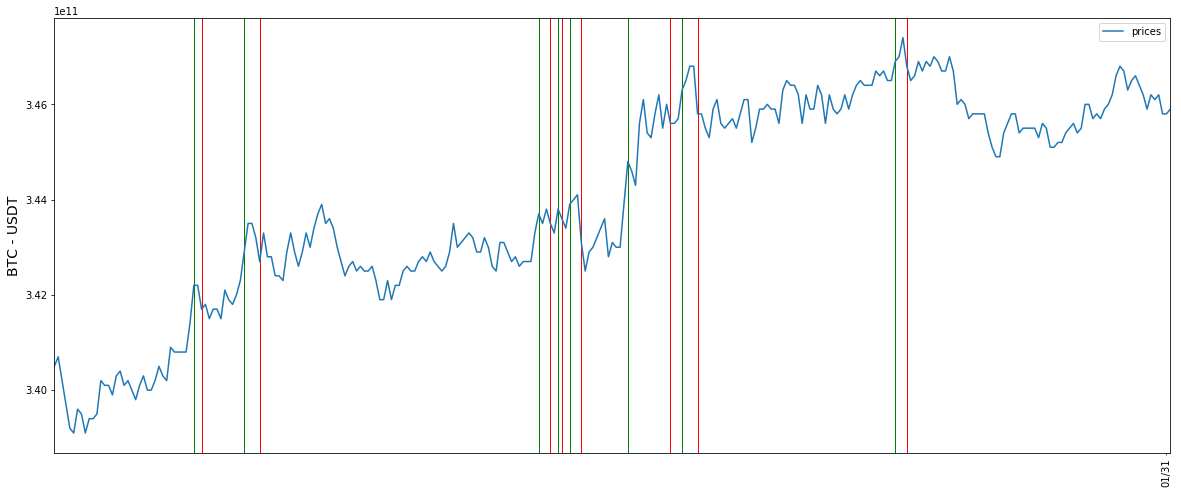

String representation:
if_then_else(candlestick_momentum_buy(ARG0), if_then_else(bbands_price_gt_up(ARG0), buy, sell), buy)



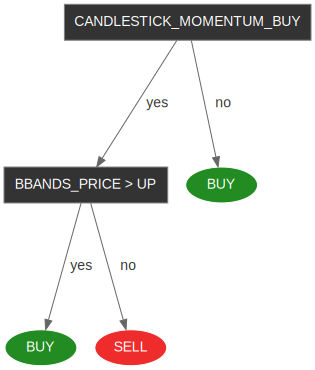

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 03:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 03:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.919345412039743e-09
2019/01/30 03:15:00 UTC  	 OrderType.SELL   	 delta_cash ->        996.54 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 341700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 03:15:00 UTC rsi_value=None
   cash: 996.5427869666861    crypto: 0.0
2019/01/30 04:10:00 UTC  	 OrderType.BUY    	 delta_cash ->       -996.54 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 342900000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

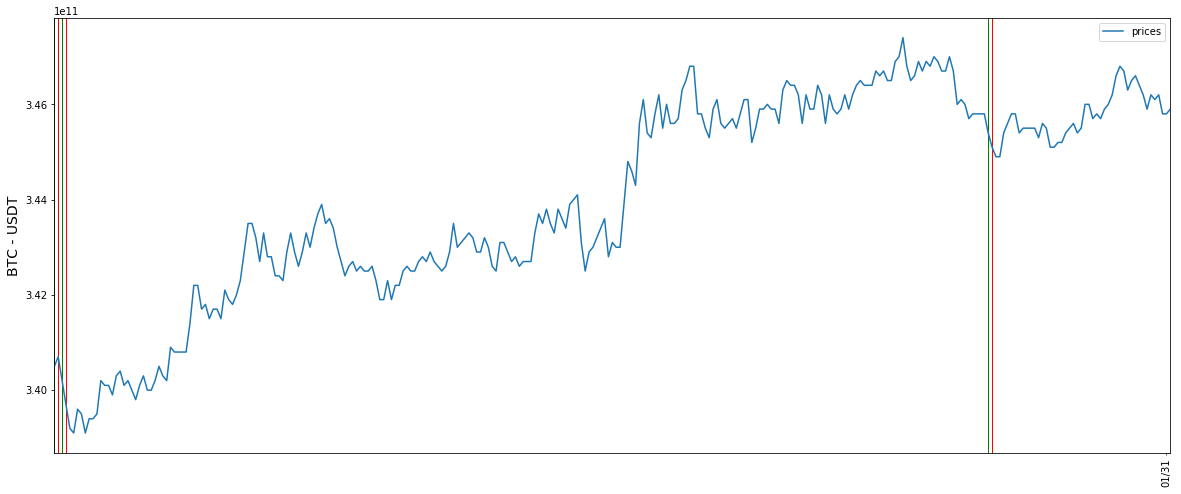

String representation:
if_then_else(bbands_squeeze_bearish(ARG0), buy, sell)



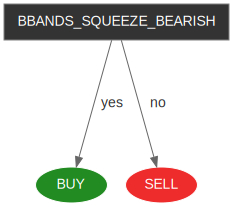

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/01/30 00:05:00 UTC
--
--
2019/01/30 00:05:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340500000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/01/30 00:05:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.933920704845815e-09
2019/01/30 00:10:00 UTC  	 OrderType.SELL   	 delta_cash ->        998.59 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 340700000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/01/30 00:10:00 UTC rsi_value=None
   cash: 998.5871973568281    crypto: 0.0
2019/01/30 00:15:00 UTC  	 OrderType.BUY    	 delta_cash ->       -998.59 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 340200000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-U

In [11]:
# Build the validation set
from apps.backtesting.data_sources import Data, DB_INTERFACE
validation_start = DB_INTERFACE.get_nearest_db_timestamp(end_timestamp, 'BTC_USDT')
validation_end = DB_INTERFACE.get_nearest_db_timestamp(end_timestamp+60*60*24, 'BTC_USDT')
from apps.backtesting.data_sources import Data, DB_INTERFACE
validation = DB_INTERFACE.build_data_object(
    start_time=validation_start,
    end_time=validation_end,
    ticker='BTC_USDT',
)

for i, row in filtered.iterrows():
    evaluation = e._build_evaluation_object(row.individual, row.variant, validation)
    e._print_individual_info(row.individual, evaluation)

In [ ]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [ ]:
Javascript(doge.show())